In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/house price data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


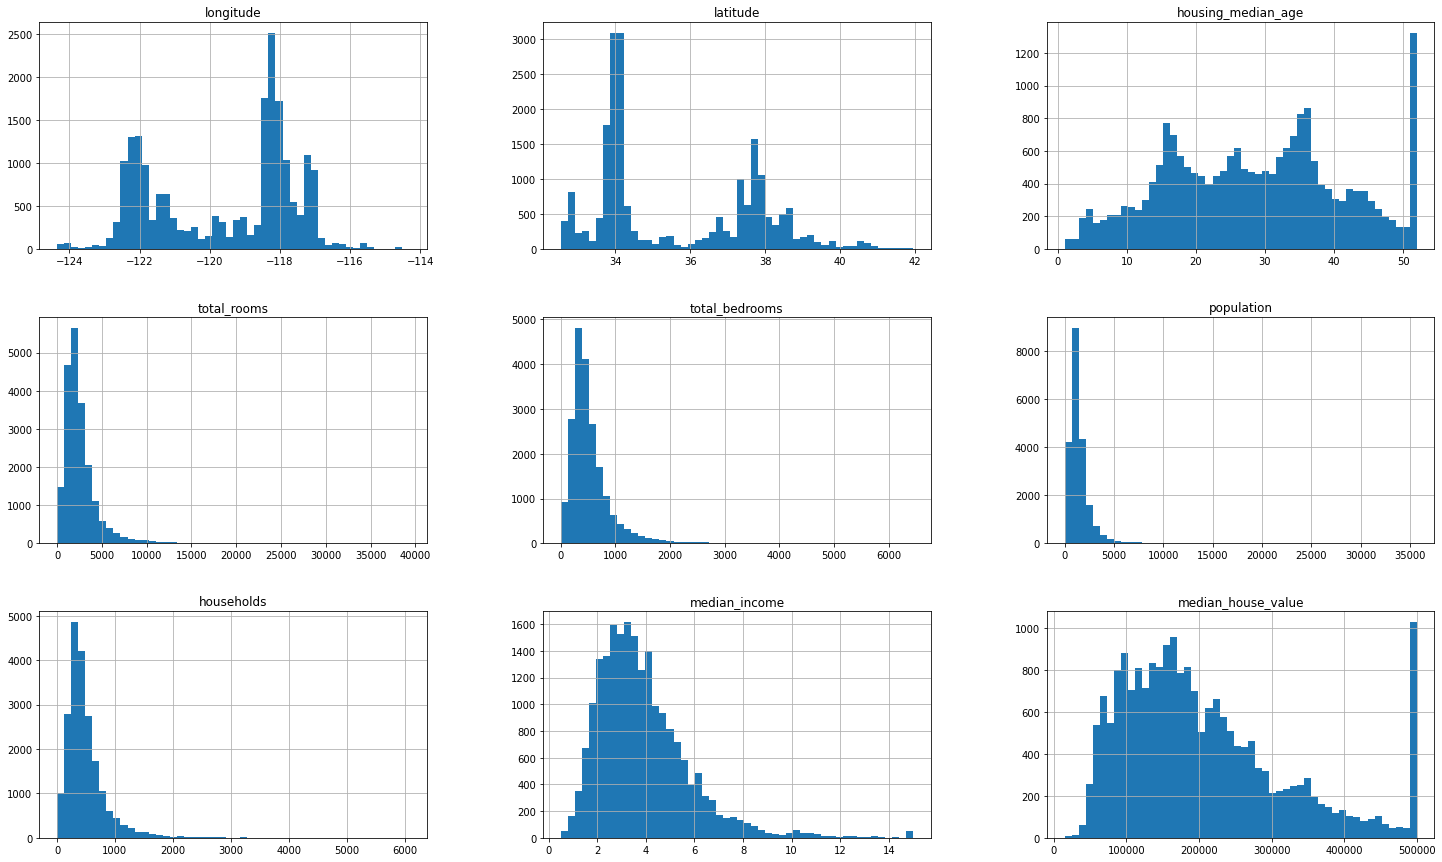

In [8]:
df.hist(bins = 50, figsize = (25, 15))
plt.show()

In [12]:
df.shape

(20640, 10)

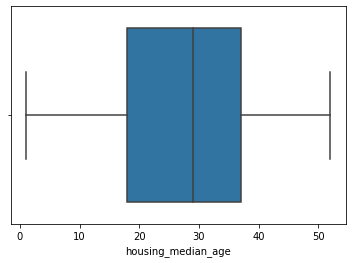

In [15]:
sns.boxplot(df['housing_median_age'])

In [21]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
num_col = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

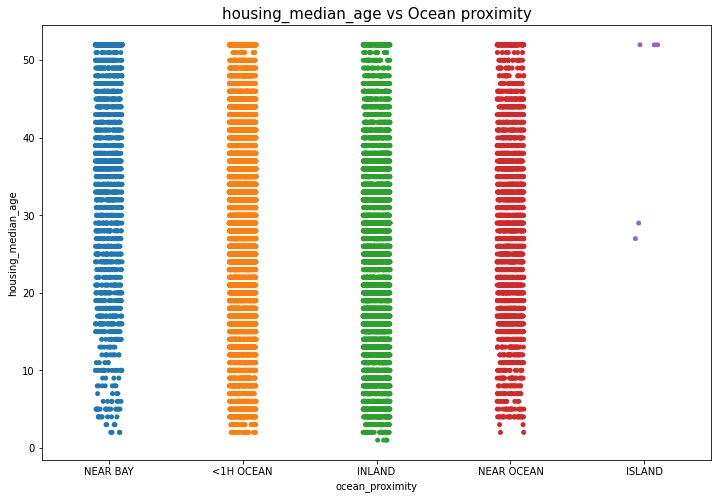

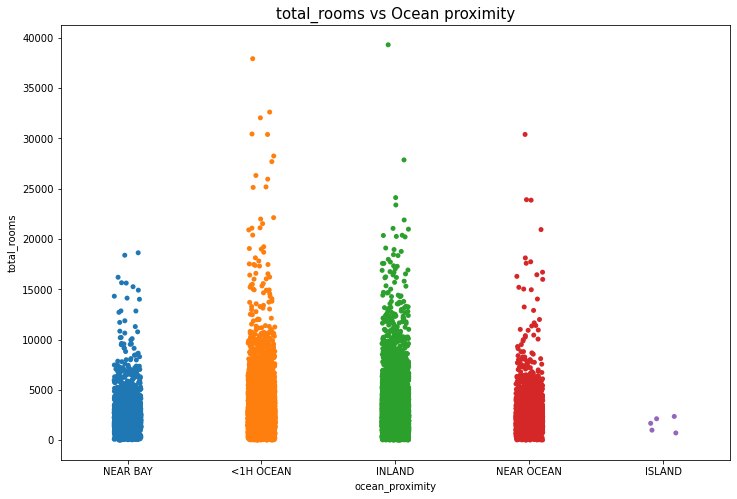

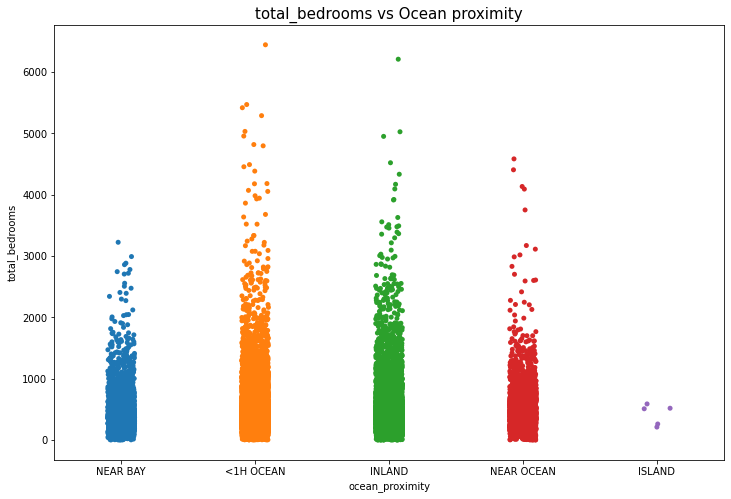

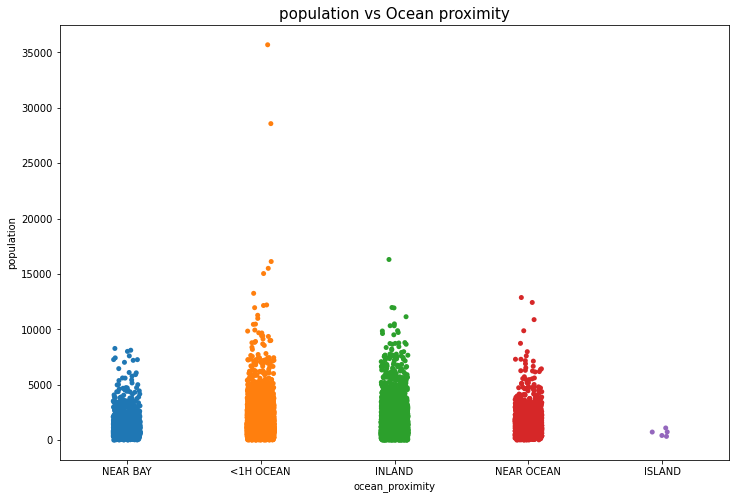

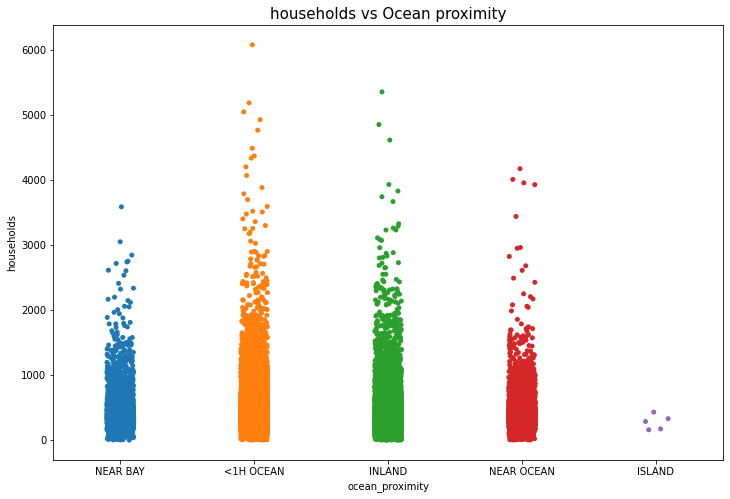

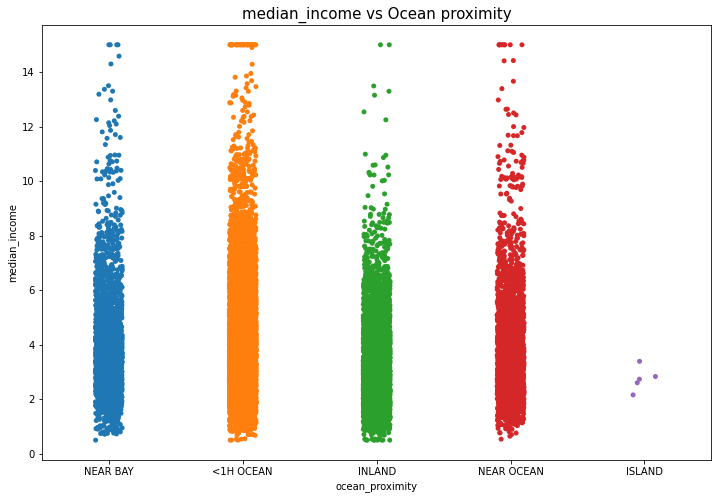

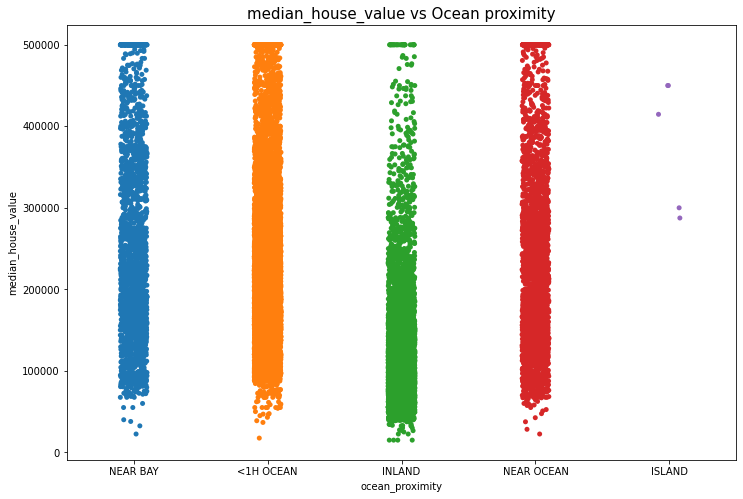

In [34]:
for i in num_col:
  plt.figure(figsize = (12, 8))
  sns.stripplot(x = 'ocean_proximity', y = i, data = df)
  ttl = i + ' vs Ocean proximity'
  plt.title(ttl, size = 15)
  plt.show()

In [28]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [30]:
new_num_col = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

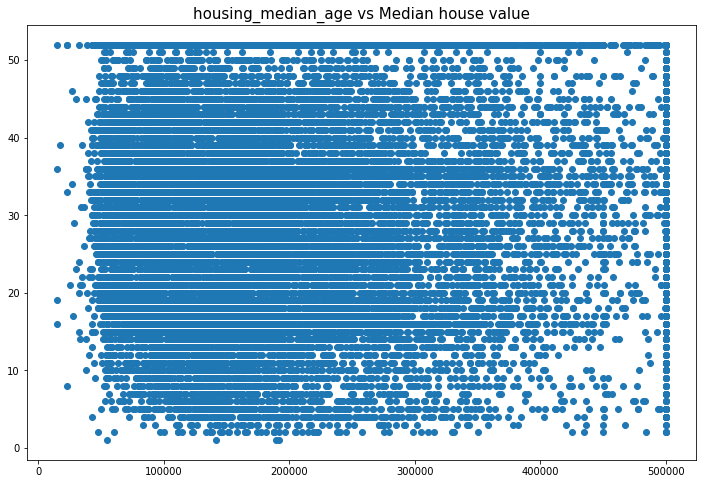

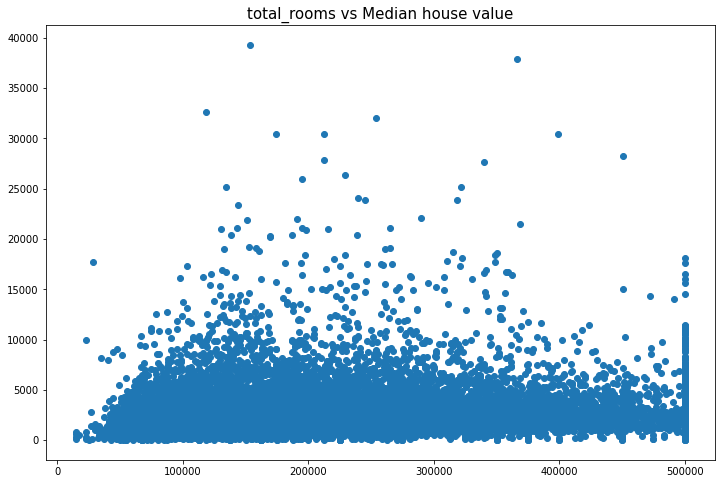

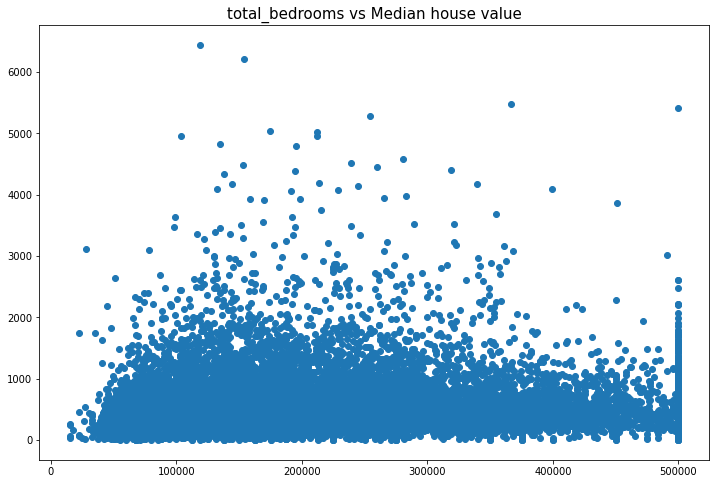

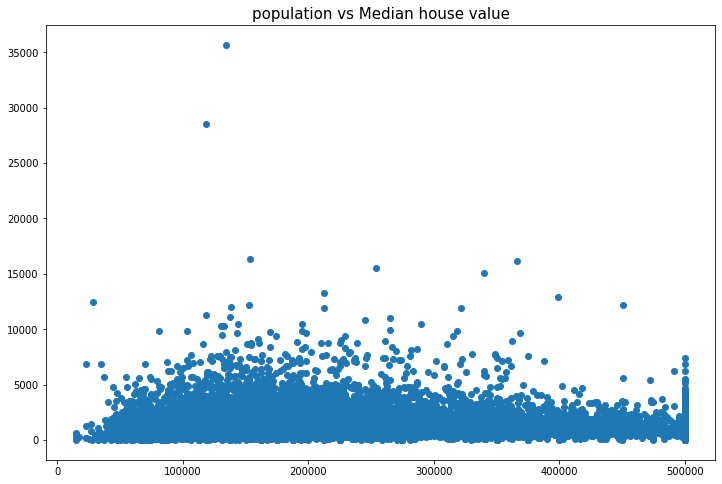

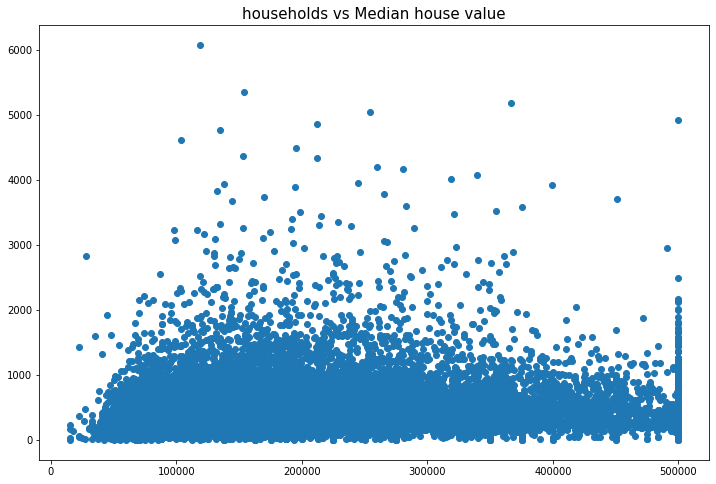

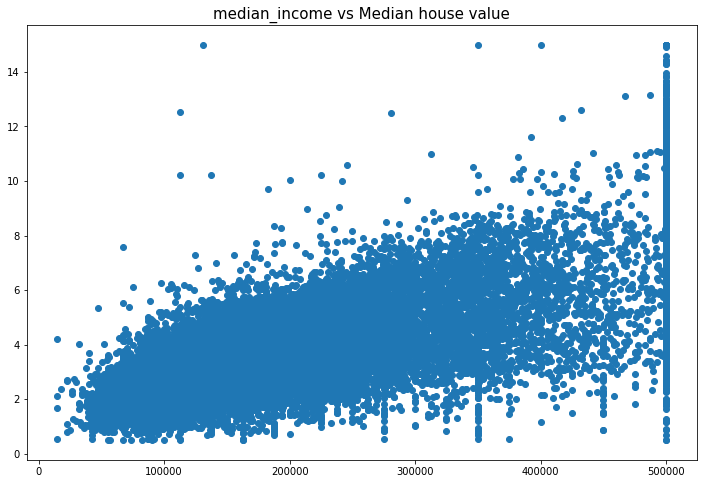

In [33]:
for i in new_num_col:
  plt.figure(figsize = (12, 8))
  plt.scatter(df['median_house_value'], df[i])
  ttl = i + ' vs Median house value'
  plt.title(ttl, size = 15)
  plt.show()

In [41]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [44]:
med = df['total_bedrooms'].median()
med

435.0

In [43]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [45]:
df['total_bedrooms'].fillna(med, inplace = True)

In [46]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

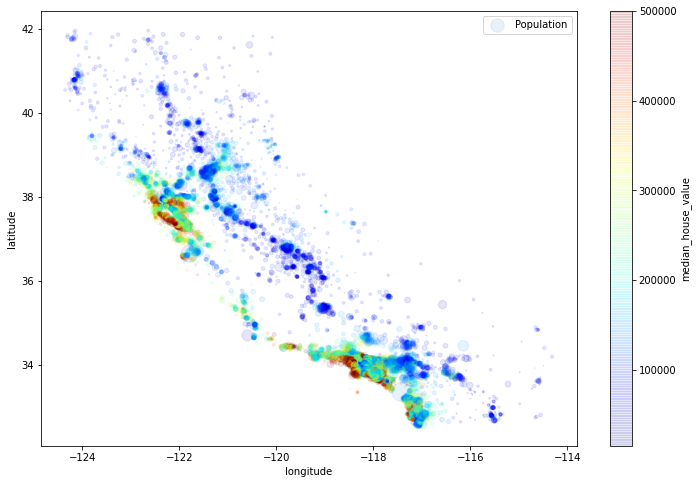

In [49]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = .1,
            s = df['population']/100, label = 'Population', figsize = (12, 8),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), sharex = False)
plt.legend()
plt.show()

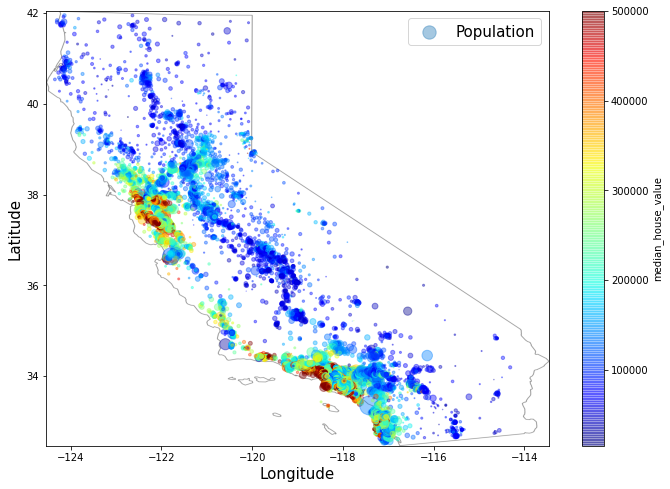

In [50]:
import matplotlib.image as mpimg
ax = df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = .4,
            s = df['population']/100, label = 'Population', figsize = (12, 8),
            c = 'median_house_value', cmap = plt.get_cmap('jet'), sharex = False)
cali_img = mpimg.imread('/content/drive/MyDrive/house price data/california-map-outline.png')
plt.imshow(cali_img, extent = [-124.55, -113.46, 32.46, 42.05] , alpha = .5, cmap = plt.get_cmap('jet'))

plt.xlabel('Longitude', size = 15)
plt.ylabel('Latitude', size = 15)

plt.legend(fontsize = 15)
plt.show()

In [51]:
df['bedrooms_per_room'] = df['total_bedrooms']/ df['total_rooms']
df['population_per_household'] = df['population']/ df['households']
df['rooms_per_household'] = df['total_rooms']/df['households']

In [52]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,population_per_household,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,2.109842,6.238137


In [53]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [54]:
df['ocean_proximity'].value_counts().index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [57]:
df['ocean_proximity'] = df['ocean_proximity'].replace({
    '<1H OCEAN' : 0,
    'INLAND' : 1,
    'NEAR OCEAN' : 2,
    'NEAR BAY' : 3,
    'ISLAND' : 4

})

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  int64  
 10  bedrooms_per_room         20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  rooms_per_household       20640 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 2.0 MB


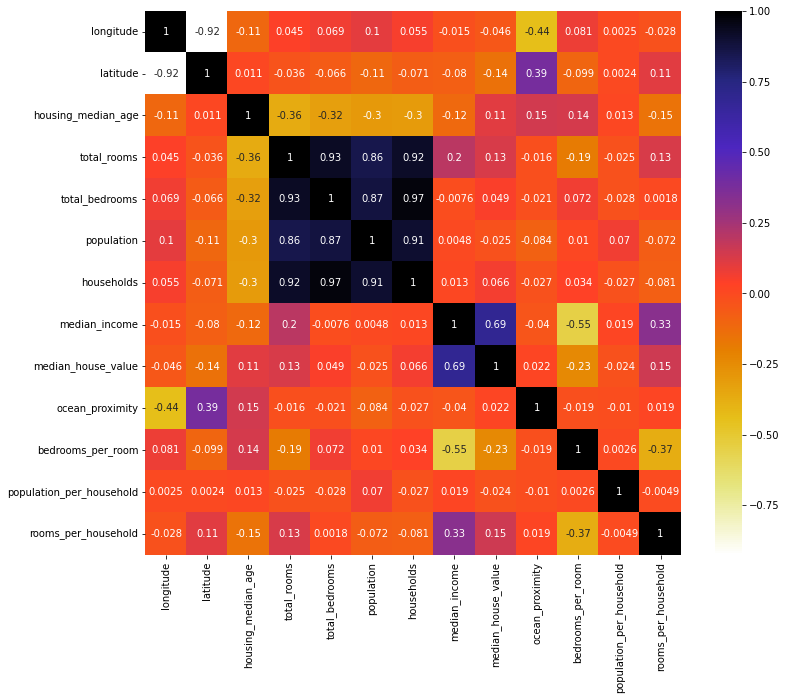

In [62]:
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, cmap = plt.cm.CMRmap_r, annot = True)
plt.show()

In [64]:
X = df.drop(['median_house_value'], axis = 1).copy()
y = df['median_house_value'].copy()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
df.shape

(20640, 13)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .1)

In [85]:
lr = LinearRegression()

In [86]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lr_predict = lr.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
print(np.sqrt(mean_squared_error(y_test, lr_predict)))

69935.45332923245


In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rr = RandomForestRegressor()

In [92]:
rr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
rr_pred = rr.predict(X_test)

In [94]:
print(np.sqrt(mean_squared_error(y_test, rr_pred)))

49327.36758555059
